# Setareh Solouki - Assignment 6

## 1 - Demand Estimation

Total sales refers to the actual number of products that were sold during a given period of time, while demand refers to the quantity of a product that customers are willing and able to purchase at a given price during that same period of time. The difference between total sales and demand can occur when a product or service is sold out before all potential customers have had the opportunity to purchase it. In this case, the total sales may be lower than the demand for the product or service, since some customers were not able to purchase it due to limited availability. 

Estimating the demand for sold-out items can be important for several reasons. Firstly, it can provide insights into the level of customer interest in the product, and help businesses to determine whether they should increase production or stock levels to meet this demand. Secondly, estimating demand for sold-out items can help businesses to plan future product launches or promotional campaigns, by providing information about the potential customer base for similar products or services. Finally, estimating demand for sold-out items can also help businesses to identify any gaps or limitations in their supply chain or production processes, and take steps to address them in order to avoid future stockouts and lost sales.

## 2 - Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data and Pre-Processing

In [207]:
Data=pd.read_csv("Flashion_Data_Part1.csv")

# Randomly select 1000 observations from dataset
Dataset = Data.sample(n=1000, random_state=42).reset_index()
Dataset = Dataset.drop('index', axis=1)

In [208]:
Dataset.head()

,Item#,Total sales,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,hour 8,...,hour 18,hour 19,hour 20,hour 21,hour 22,hour 23,hour 24,sum,Sold Out,Sold out Time
0,2222,4161,0.139,0.070,0.014,0.080,0.054,0.022,0.001,0.059,...,0.033,0.033,0.032,0.029,0.011,0.047,0.021,1.000,No,NaN
1,1229,4573,0.150,0.041,0.058,0.036,0.063,0.051,0.003,0.010,...,0.021,0.048,0.013,0.015,0.035,0.001,0.031,0.999,No,NaN
2,1160,3570,0.139,0.046,0.072,0.081,0.081,0.070,0.040,0.008,...,0.031,0.000,0.000,0.000,0.000,0.000,0.000,1.001,Yes,18.0
3,2395,5696,0.147,0.051,0.077,0.062,0.016,0.004,0.003,0.007,...,0.045,0.012,0.028,0.037,0.029,0.002,0.001,1.000,No,NaN
4,880,7822,0.119,0.022,0.081,0.016,0.009,0.015,0.068,0.057,...,0.030,0.008,0.003,0.000,0.000,0.000,0.000,0.998,Yes,20.0


In [209]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item#          1000 non-null   int64  
 1   Total sales    1000 non-null   int64  
 2   hour 1         1000 non-null   float64
 3   hour 2         1000 non-null   float64
 4   hour 3         1000 non-null   float64
 5   hour 4         1000 non-null   float64
 6   hour 5         1000 non-null   float64
 7   hour 6         1000 non-null   float64
 8   hour 7         1000 non-null   float64
 9   hour 8         1000 non-null   float64
 10  hour 9         1000 non-null   float64
 11  hour 10        1000 non-null   float64
 12  hour 11        1000 non-null   float64
 13  hour 12        1000 non-null   float64
 14  hour 13        1000 non-null   float64
 15  hour 14        1000 non-null   float64
 16  hour 15        1000 non-null   float64
 17  hour 16        1000 non-null   float64
 18  hour 17  

In [210]:
Dataset.duplicated().sum()

0

In [212]:
cols = [x for x in list(Dataset) if x not in ('Item#','Total sales','sum','Sold Out','Sold out Time')]
df = Dataset[cols]


### 2 - 1: Clustering for k = 2, 3, 4, 5

In [213]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore") 

##### K=2
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(df)
cen_2 = pd.DataFrame(kmeans.cluster_centers_)
pred_2 = kmeans.predict(df)
Dataset['cluster_2'] = pred_2 

##### K=3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(df)
cen_3 = pd.DataFrame(kmeans.cluster_centers_)
pred_3 = kmeans.predict(df)
Dataset['cluster_3'] = pred_3 

##### K=4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(df)
cen_4 = pd.DataFrame(kmeans.cluster_centers_)
pred_4 = kmeans.predict(df)
Dataset['cluster_4'] = pred_4

##### K=5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(df)
cen_5 = pd.DataFrame(kmeans.cluster_centers_)
pred_5 = kmeans.predict(df)
Dataset['cluster_5'] = pred_5 


### 2-2: Plot the total within the sum of squares and the average distance of points in different clusters

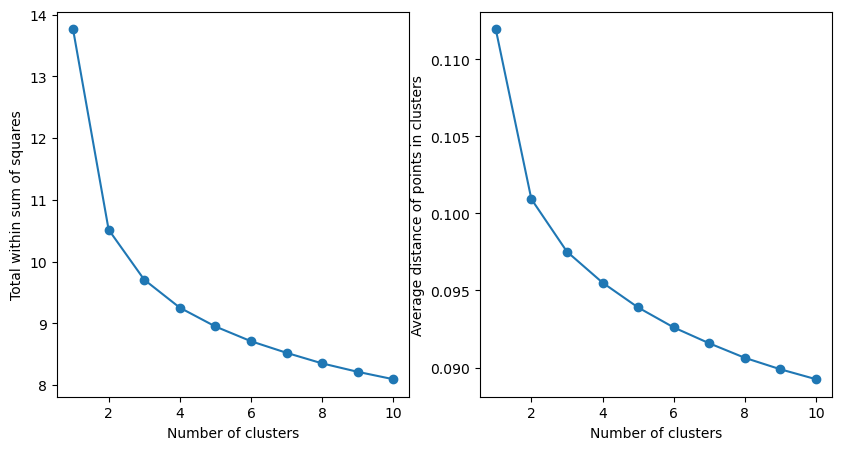

In [214]:
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances


X = df

# Fit the k-means model for different numbers of clusters
K_values = range(1, 11)
inertias = []
avg_distances = []
for K in K_values:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    distances = euclidean_distances(X, kmeans.cluster_centers_)
    avg_distances.append(np.mean(np.min(distances, axis=1)))

# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].plot(K_values, inertias, 'o-')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Total within sum of squares')

ax[1].plot(K_values, avg_distances, 'o-')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Average distance of points in clusters')

plt.show()


### 2-3: Estimating the demand for sold-out items

In [215]:
df2 = Dataset[Dataset['Sold Out'] == 'Yes']

In [216]:
lost_2=[]
for index, row in df2.iterrows():
    row_number = int(row["cluster_2"])
    col_number = int(row["Sold out Time"])
    lost = cen_2.iloc[row_number, col_number:24].sum()
    lost_2.append(lost)
    
lost_2 = pd.DataFrame(lost_2).set_axis(['lost_2'], axis=1)

############################################################
lost_3=[]
for index, row in df2.iterrows():
    row_number = int(row["cluster_2"])
    col_number = int(row["Sold out Time"])
    lost = cen_3.iloc[row_number, col_number:24].sum()
    lost_3.append(lost)
    
lost_3 = pd.DataFrame(lost_3).set_axis(['lost_3'], axis=1)

############################################################
lost_4=[]
for index, row in df2.iterrows():
    row_number = int(row["cluster_2"])
    col_number = int(row["Sold out Time"])
    lost = cen_4.iloc[row_number, col_number:24].sum()
    lost_4.append(lost)
    
lost_4 = pd.DataFrame(lost_4).set_axis(['lost_4'], axis=1)

############################################################
lost_5=[]
for index, row in df2.iterrows():
    row_number = int(row["cluster_2"])
    col_number = int(row["Sold out Time"])
    lost = cen_5.iloc[row_number, col_number:24].sum()
    lost_5.append(lost)
    
lost_5 = pd.DataFrame(lost_5).set_axis(['lost_5'], axis=1)

In [217]:
# Concatenate the tables horizontally
df3 = pd.concat([df2.reset_index(), lost_2, lost_3, lost_4, lost_5], axis=1, join='outer')


In [218]:
df3['demand_2'] = df3['Total sales']/(1-df3['lost_2'])
df3['demand_3'] = df3['Total sales']/(1-df3['lost_3'])
df3['demand_4'] = df3['Total sales']/(1-df3['lost_4'])
df3['demand_5'] = df3['Total sales']/(1-df3['lost_5'])
df3

,index,Item#,Total sales,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,...,cluster_4,cluster_5,lost_2,lost_3,lost_4,lost_5,demand_2,demand_3,demand_4,demand_5
0,2,1160,3570,0.139,0.046,0.072,0.081,0.081,0.070,0.040,...,3,3,0.043724,0.020939,0.118778,0.003308,3733.229991,3646.351033,4051.191527,3581.847650
1,4,880,7822,0.119,0.022,0.081,0.016,0.009,0.015,0.068,...,3,3,0.019906,0.008695,0.070822,0.000846,7980.866183,7890.609815,8418.195298,7828.624220
2,6,1477,3471,0.134,0.060,0.013,0.069,0.040,0.012,0.067,...,3,3,0.019906,0.008695,0.070822,0.000846,3541.496615,3501.445496,3735.560711,3473.939487
3,7,669,2961,0.137,0.037,0.056,0.077,0.075,0.016,0.026,...,1,4,0.057300,0.061025,0.062023,0.076298,3140.978042,3153.439653,3156.793343,3205.580890
4,11,2120,3218,0.107,0.049,0.072,0.027,0.023,0.066,0.077,...,0,4,0.080459,0.085207,0.086063,0.100123,3499.572207,3517.736777,3521.029893,3576.044587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,989,319,4379,0.146,0.065,0.076,0.061,0.010,0.060,0.044,...,1,2,0.035927,0.038845,0.039385,0.050517,4542.184831,4555.976624,4558.536890,4611.983201
348,994,1110,3773,0.106,0.063,0.062,0.032,0.074,0.080,0.029,...,1,4,0.057300,0.061025,0.062023,0.076298,4002.333722,4018.212702,4022.486079,4084.652718
349,996,1059,3447,0.121,0.080,0.082,0.080,0.019,0.019,0.023,...,1,2,0.035927,0.038845,0.039385,0.050517,3575.453554,3586.309984,3588.325339,3630.396459
350,998,1473,6201,0.109,0.007,0.054,0.013,0.078,0.008,0.025,...,3,3,0.012529,0.004537,0.049390,0.000115,6279.680705,6229.259568,6523.183121,6201.715583


### Visualizing the mean of demands for each k

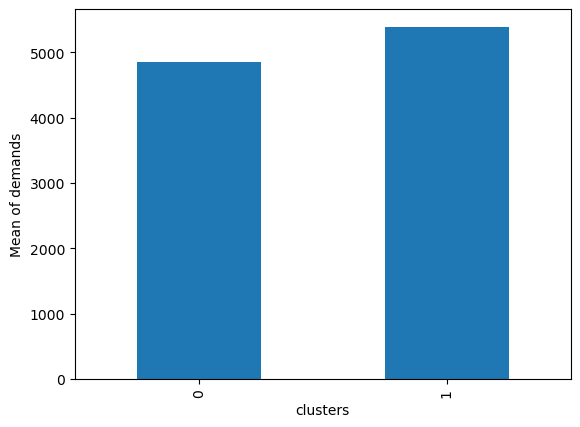

In [220]:
import matplotlib.pyplot as plt

grouped = df3.groupby('cluster_2')
means = grouped['demand_2'].mean()

# Plot the means using a bar chart
means.plot(kind='bar')
plt.xlabel('clusters')
plt.ylabel('Mean of demands')
plt.show()

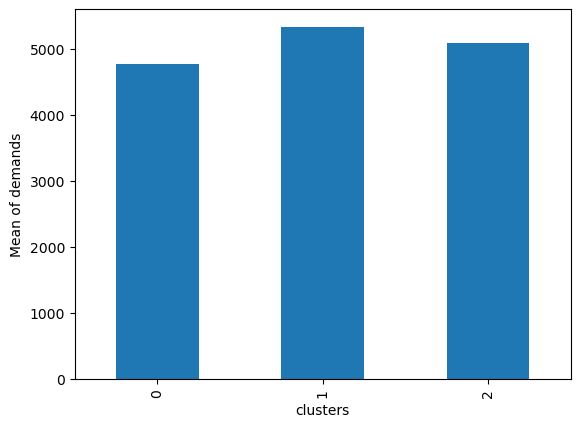

In [221]:
grouped = df3.groupby('cluster_3')
means = grouped['demand_3'].mean()

# Plot the means using a bar chart
means.plot(kind='bar')
plt.xlabel('clusters')
plt.ylabel('Mean of demands')
plt.show()

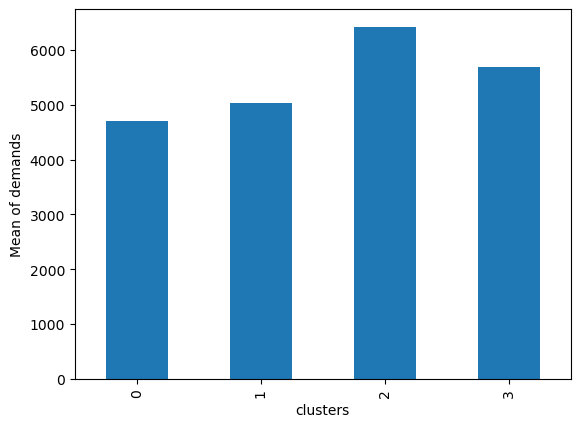

In [222]:
grouped = df3.groupby('cluster_4')
means = grouped['demand_4'].mean()

# Plot the means using a bar chart
means.plot(kind='bar')
plt.xlabel('clusters')
plt.ylabel('Mean of demands')
plt.show()

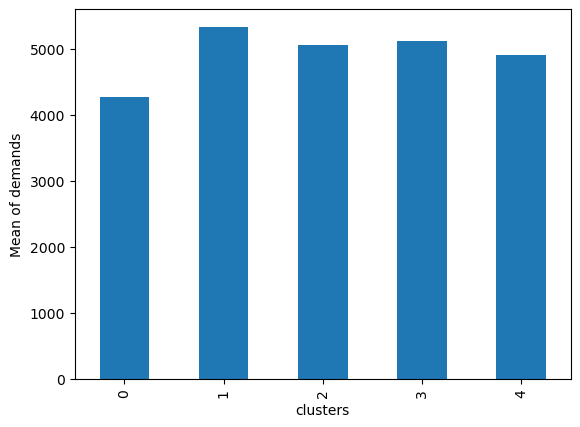

In [223]:
grouped = df3.groupby('cluster_5')
means = grouped['demand_5'].mean()

# Plot the means using a bar chart
means.plot(kind='bar')
plt.xlabel('clusters')
plt.ylabel('Mean of demands')
plt.show()

### 2-4: Optimal number of clusters

The total within the sum of squares plot (elbow method) shows that at k = 3 the rate of decrease in WSS begins to level off (elbow point) and thus we can take it as the optimal number of clusters. 